## Previsão de Sobrevivência do Titanic

Vamos analisar o conjunto de dado que contém informações e dados demográficos de 891 dentre os 2.224 passageiros e tripulação a bordo do Titanic e tentar descobrir o motivo de alguns grupos de pessoas serem mais propensas a sobreviver do que outras. Para fazer isso, iremos seguir os seguintes passos:

* Análise e exploração dos dados
* Brainstorm
* Wrangle(Limpar, preparar e arrumar os dados)
* Visualizar, reportar e demonstrar nossas descobertas

## 1. Importando bibliotecas essencias

+ Pandas: Utilizada para transformar os dados contidos no csv em um dataframe de fácil manipulação
+ Numpy : Utilizada para facilitar nosso esforço na análise dos dados
+ Seaborn e Matplotlib : Utilizada para construir, customizar e mostrar os gráficos da análise feita

In [485]:
#Importing the pandas library, responsable to manipulate and tranform the data contained on csv files on dataframes
import pandas as pd
#Importing the numpy library, responsible to smooth our effort in analyze the data
import numpy as np
#Importing the matplotlib and seaborn libraries, responsable to show the graphs about the findings
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Carregando os dados e verificando o seu conteúdo

Pandas é muito útil para carregar e trabalhar com os dados contidos no arquivo csv. Aqui estamos carregando os dados contidos em um csv para uma estrutura do Panda chamada dataframe do Panda de fácil manipulação e também carregando uma parte dos dados para verificar seu conteúdo.


In [457]:
passengers  = pd.read_csv('titanic-data-6.csv')
passengers.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Verificando algumas estatísticas

* Total de passageiros é de 891 no total
* A taxa de sobrevivência foi em torno de 38%
* Por volta de 75% dos passageiros viajaram sozinhos
* A média de idade é perto de 30 anos
* A média da tarifa paga foi em torno de 32

In [588]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.371493,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.277422,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Formulando a pergunta

Após conhecer e entender a estrutura dos nossos dados, assim como os seus valores, a dúvida que mais se acentua é : 

*Quais features(colunas) tem uma correlação com o fator sobrevivência?*

Como em todo o desastre, preferências de sobrevivência são dadas moralmente para mulheres, crianças, idosos e familias, porém também sabemos que pessoas de alto poder aquisitivo podem ter sido beneficiadas. 

Então vamos analisar e descobrir se os fatores como *Taxa(FareGroup)*,*Classe do Ticket(Pclass)*, *Genêro(Sex)*, *Família/Sozinho(FamilySize)* afetaram o fator sobrevivência também no desastre do Titanic. 

As perguntas seram as seguintes:

* O fator classe ou fator taxa da passagem tiveram relação com o fator sobrevivência? Pessoas com poder aquisitivo maior tinham propensão a sobreviver mais que pessoas com poder aquisitivo menor?
* O fator ser passageiro único ou viajar em família teve relação com o fator sobrevivência? Famílias tiveram mais chances de sobreviver do que pessoas viajando sozinha? E o tamanho da família interferia nessa correlação?
* O fator genêro teve relação com o fator sobrevivência? Mulheres tiveram mais propensão a sobreviver do que os homens?

## 5. Classificando as colunas do dataframe

######  **Dados categóricos**   
São dados que servem de label de um grupo de items ou indivíduos. Dados categóricos possuem a seguinte subdivisão:
* __Ordinal: __  São dados que não ordem ou algum tipo de ranking de classificação associado.
* __Nominal: __  São dados que possuem um ranking de classificação associado.
        
        
###### **Dados Quantitativos** 
São dados na qual podemos operar matematicamente em cima deles para obter insights úteis. Dados quantitativos possuem a seguinte subdivisão:
* __Discreto: __ São dados que podem ser subdivididos cada vez mais em menores unidades.
* __Contínuo: __ São dados que não podem ser subdividios em menores unidades.


Nossa classificação das colunas é a seguinte: 

######  **Dados categóricos**   
*  **Ordinal: ** Pclass
*  **Nominal: ** Survived, Sex, and Embarked

######  **Dados Quantitativos**   
*  **Discreto: ** SibSp, Parch
*  **Contínuo: ** Age, Fare



## 6. Verificando a qualidades dos dados

Realizaremos uma pré-análise para descobrir se existem colunas com dados faltantes, nulos ou vazio. 

Podemos verificar que as colunas Age, Cabin and Embarked possuem 177, 687 e 2 dados nulos respectivamentos. 


In [458]:
print(passengers.isnull().sum())
print(passengers.info())
print("Duplicated - {}".format(passengers.duplicated().sum()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
Duplicated - 0


## 7. Estratégia para as colunas com dados faltantes

### 7.1 Dados Quantitativos
Iremos complementar as colunas com dados faltantes utilizando a mediana pra cada Title e transformar o tipo da coluna pra inteiro, que é a representação adequada para a coluna. 
Os seguintes passos serão executados:
1. Criaremos uma coluna chamada Title para nos ajudar a calcular a idade referente ao título que a pessoa possui no nome
2. Calcularemos a mediana da idade pra cada título
3. Preencheremos os valores nulos com a mediana da idade referente ao título que a pessoa possui




In [459]:
passengers["Title"] = passengers.Name.str.extract('([A-Za-z]+)\.', expand=False)
ages                = passengers.groupby('Title')['Age'].median()
for title in passengers.Title.unique():
    median = ages[title]
    passengers.loc[(passengers.Age.isnull()) & (passengers.Title == title),"Age"] = median

passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## 7.2 Dados Qualitativos
Iremos completar as colunas com os dados faltantes utilizando a moda da distribuição. A coluna cabine possui vários valores nulos e como já temos a classe do ticket não irá nos atrapalhar na análise, então iremos dropar essa coluna.

In [460]:
passengers.Embarked.fillna(passengers['Embarked'].mode()[0],inplace=True)
passengers.drop("Cabin",axis="columns",inplace=True)
passengers.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

## 8. Criando novas colunas

Criaremos colunas novas afim de facilitar a análise dos dados

1. FamilySize - Irá representar a quantidade de pessoas de uma família na qual essa pessoa pertence. Se o valor for 1, indica que essa pessoa viajou sozinha.
2. AgeGroup   - Categorização das Idades. 
3. FareGroup  - Categorização das Tarifas em 4 faixas

In [587]:
passengers["FamilySize"]  = passengers.SibSp + passengers.Parch+ 1
passengers.Age            = passengers.Age.astype(int)
passengers["AgeGroup"]    = pd.cut(passengers.Age,range(0,90,15))
passengers["FareGroup"]   = pd.cut(passengers.Fare,4,labels=["Cheap","Normal","Expensive","Very Expensive"])
passengers.FamilySize     = pd.cut(passengers.FamilySize,[0,1,4,passengers.FamilySize.max()],labels=["Single","Normal","Large"])


## 9. Visualização Features x Sobrevivência

Primeiro construímos uma função que passado o nome da feature, ela gera um gráfico relacionado a feature Survived


In [559]:
def generate_graph(feature,graph="bar"):
    """
    Função que recebe o nome da feature e gera o gráfico relacionado a feature Survived
    Argumentos:
        feature:  String contendo o nome da feature
    Retorna:
        None
    """
    ax       = None
    group    = passengers.groupby(["Survived",feature],sort=True).size()
    df_aux   = pd.concat([group[0],group[1]],axis=1).fillna(0)
    ax       = df_aux.plot(kind=graph,title=feature,grid=True,legend="reverse",rot=60,stacked=False)
    ax.set_ylabel("Number of people")
    ax.legend(["Not Survived", "Survived"]);
    


## 9.1 Gráfico Pclass x Survived

No gráfico vemos que a 1º classe foi a única com taxa de sobrevivência maior do que a de não sobrevivência comparada as outras classes(2º,3º) e que na 3º classe a discrepância entre mortos e sobreviventes foi bem alta comparada as outras classes(1º,2º), com muito mais mortos do que sobreviventes.

A tendência de sobrevivência é maior em pessoas da 1º mas no caso das outras classes(2º,3º) principalmente na 3º, a tendência é de não sobrevivência

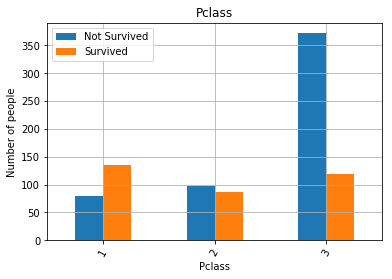

In [579]:
generate_graph("Pclass")


## 9.2 Gráfico Sex x Survived

No gráfico vemos que a taxa de sobrevivência de mulheres foi maior do que a de não sobrevivência comparada a taxa dos homens.

A tendência de sobrevivência é maior nas mulheres do que nos homens.

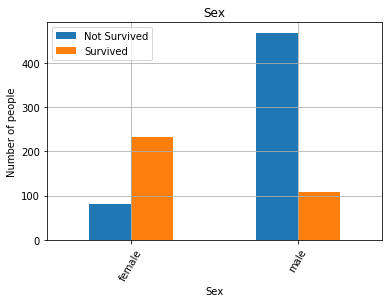

In [580]:
generate_graph("Sex")

## 9.3 Gráfico FamilySize x Survived

Temos uma categorização da quantidade de familiares:
* Single          - (1)
* Normal          - (2 - 4)
* Large           - (5 - 11)

No gráfico vemos famílias de tamanho normal, de 2 até 4 integrantes foi a única com taxa de sobrevivência maior do que a de não sobrevivência comparada com as outras categorias.

A tendência de sobrevivência é maior em famílias de tamanho normal, do que em famílias grandes ou até mesmo se a pessoa estivesse viajando sozinha.


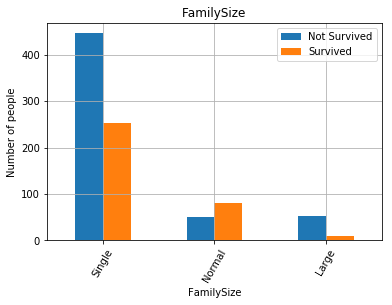

In [586]:
generate_graph("FamilySize")

## 9.4 Gráfico FareGroup x Survived e Fare x Survived

Temos uma categorização dos valores da Tarifa pagas:
* Cheap           - (0 - 128.082)
* Normal          - (128.083 - 256.165)
* Expensive       - (256.166 - 384.247)
* Very Expensive  - (384.248 - 512.329)

No gráfico vemos que a tarifa mais barata foi a única que teve a taxa de não sobrevivência maior do que de sobrevivência e com uma discrepância muito alta comparada com as outras tarifas. 

A tendência de sobrevivência é maior em pessoas que obtiveram taxas entre Normal e Carissimas(Normal - Very Expensive) comparadas as taxas mais baratas(Cheap).

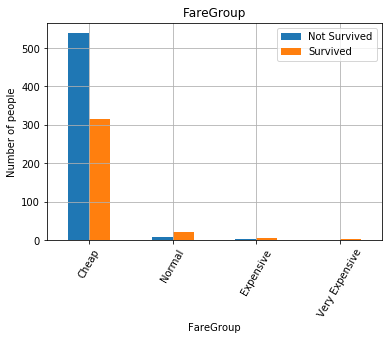

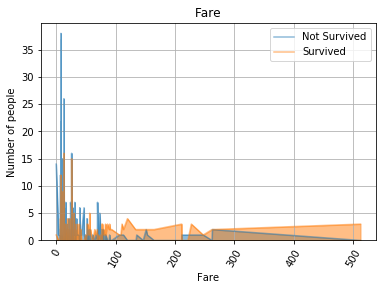

In [584]:
generate_graph("FareGroup")
generate_graph("Fare","area")




## 9.4 Gráfico AgeGroup x Survived e Age x Survived

No gráfico vemos que a faixa etária de (0 - 15) foi a única que teve mais sobreviventes do que mortos e que na faixa de (15 - 30) a discrepância entre mortos e sobreviventes foi bem alta comparada as outras faixas, com muito mais mortos do que sobreviventes.

A tendência de sobrevivência é maior em pessoas de 0 até 15 anos mas no caso das outras faixas etárias principalmente de 15 até 30, a tendência é de não sobrevivência

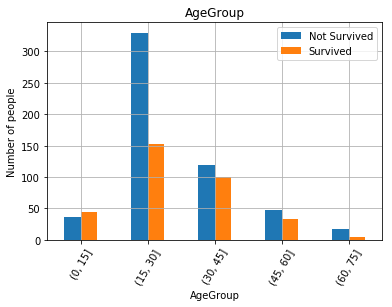

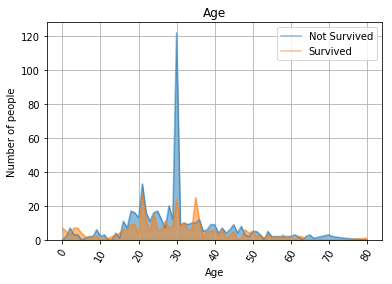

In [576]:
generate_graph("AgeGroup")
generate_graph("Age","area")